In [1]:
import pandas as pd
import numpy as np
from firebase import firebase
import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('saved_dataframe/df_pure_19_12_20.csv')

In [3]:
    input = 1592671756 + 60 * 60
df.iloc[(df['UnixTime'] - input).abs().argsort()[:10]]

,Humidity,Temperature,UnixTime,Hour,Minute
625,66.0,32.9,1592674430,17,33
624,65.0,32.9,1592674419,17,33
623,65.0,32.9,1592674408,17,33
622,65.0,32.9,1592674397,17,33
621,65.0,32.9,1592674387,17,33
620,66.0,32.9,1592674377,17,32
619,66.0,32.9,1592674366,17,32
618,66.0,32.9,1592674356,17,32
626,76.0,32.4,1592676363,18,6
617,66.0,32.9,1592674345,17,32


In [4]:
df_future = pd.DataFrame(columns = ['Humidity', 'Temperature', 'UnixTime', 'Hour', 'Minute', 
                                          'Humidity_Future', 'Temperature_Future', 'UnixTime_Future', 'Hour_Future', 'Minute_Future'])

In [5]:
threshold = 60 * 60

for i, j in df.iterrows():
    input = j['UnixTime'] + threshold
    feature = df.iloc[(df['UnixTime'] - input).abs().argsort()[:2]]
    selected = feature.iloc[0]
    
    if selected['UnixTime'] == j['UnixTime']:
        break
    
    if abs(selected['UnixTime'] - j['UnixTime'] - threshold) > abs(feature.iloc[1]['UnixTime'] - j['UnixTime'] - threshold):
        selected = feature.iloc[1]
        
    df_future = df_future.append({'Humidity' : j['Humidity'], 
                    'Temperature' : j['Temperature'], 
                    'UnixTime' : j['UnixTime'], 
                    'Hour' : j['Hour'], 
                    'Minute' : j['Minute'], 
                    'Humidity_Future' : selected['Humidity'], 
                    'Temperature_Future' : selected['Temperature'], 
                    'UnixTime_Future' : selected['UnixTime'], 
                    'Hour_Future' : selected['Hour'], 
                    'Minute_Future' : selected['Minute']},  
                   ignore_index = True)
    if i % 1000 == 0:
        print(i)
        
print('done')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
done


In [29]:
# pd.set_option('display.float_format', lambda x: '%.10f' % x)
pd.reset_option('display.float_format')

In [8]:
df_future.loc[377]

Humidity                     65.0000000000
Temperature                  33.5000000000
UnixTime             1592671756.0000000000
Hour                         16.0000000000
Minute                       49.0000000000
Humidity_Future              66.0000000000
Temperature_Future           32.9000000000
UnixTime_Future      1592674430.0000000000
Hour_Future                  17.0000000000
Minute_Future                33.0000000000
Name: 377, dtype: float64

In [23]:
verify_time = []
for i, j in df_future.iterrows():
    time_dist = abs(j['UnixTime_Future'] - j['UnixTime'] - 60 * 60) 
    verify_time.append(time_dist)
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
6000
7000
8000
9000
10000
11000
12000


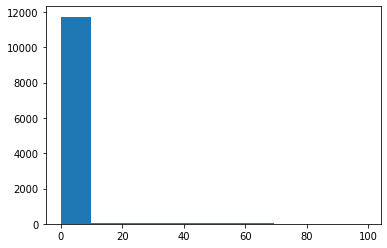

In [24]:
np.max(verify_time)
n, bins, patches = plt.hist(verify_time)
plt.show()

In [14]:
print(n)
print(bins)
print(patches)

[12271.   358.   277.   102.    68.    51.    66.    50.    35.    45.]
[   0.  359.  718. 1077. 1436. 1795. 2154. 2513. 2872. 3231. 3590.]
<a list of 10 Patch objects>


In [22]:
for i, j in df_future.iterrows():
    if abs(j['UnixTime_Future'] - j['UnixTime'] - 60 * 60) >= 100:
        df_future.drop(index = i, inplace = True)

In [25]:
df_future.reset_index(drop=True, inplace=True)
df_future

,Humidity,Temperature,UnixTime,Hour,Minute,Humidity_Future,Temperature_Future,UnixTime_Future,Hour_Future,Minute_Future
0,72.0000000000,34.6000000000,1592667750.0000000000,15.0000000000,42.0000000000,66.0000000000,33.5000000000,1592671351.0000000000,16.0000000000,42.0000000000
1,66.0000000000,34.6000000000,1592667761.0000000000,15.0000000000,42.0000000000,66.0000000000,33.5000000000,1592671362.0000000000,16.0000000000,42.0000000000
2,66.0000000000,34.6000000000,1592667774.0000000000,15.0000000000,42.0000000000,66.0000000000,33.5000000000,1592671372.0000000000,16.0000000000,42.0000000000
3,66.0000000000,34.6000000000,1592667784.0000000000,15.0000000000,43.0000000000,66.0000000000,33.5000000000,1592671382.0000000000,16.0000000000,43.0000000000
4,66.0000000000,34.6000000000,1592667794.0000000000,15.0000000000,43.0000000000,66.0000000000,33.5000000000,1592671393.0000000000,16.0000000000,43.0000000000
5,66.0000000000,34.6000000000,1592667805.0000000000,15.0000000000,43.0000000000,66.0000000000,33.5000000000,1592671403.0000000000,16.0000000000,43.0000000000
6,65.0000000000,34.7000000000,1592667815.0000000000,15.0000000000,43.0000000000,66.0000000000,33.5000000000,1592671413.0000000000,16.0000000000,43.0000000000
7,65.0000000000,34.7000000000,1592667825.0000000000,15.0000000000,43.0000000000,66.0000000000,33.5000000000,1592671424.0000000000,16.0000000000,43.0000000000
8,64.0000000000,34.8000000000,1592667857.0000000000,15.0000000000,44.0000000000,66.0000000000,33.5000000000,1592671456.0000000000,16.0000000000,44.0000000000
9,64.0000000000,34.9000000000,1592667877.0000000000,15.0000000000,44.0000000000,66.0000000000,33.5000000000,1592671477.0000000000,16.0000000000,44.0000000000


In [26]:
df_future.to_csv(r'saved_dataframe/df_with_1h_future_raw_21_12_20.csv', index=False, header=True)

In [30]:
# df_future.drop(df_future.columns[2], axis=1, inplace=True)
# df_future.drop(df_future.columns[6], axis=1, inplace=True)
df_future

,Humidity,Temperature,Hour,Minute,Humidity_Future,Temperature_Future,Hour_Future,Minute_Future
0,72.0,34.6,15.0,42.0,66.0,33.5,16.0,42.0
1,66.0,34.6,15.0,42.0,66.0,33.5,16.0,42.0
2,66.0,34.6,15.0,42.0,66.0,33.5,16.0,42.0
3,66.0,34.6,15.0,43.0,66.0,33.5,16.0,43.0
4,66.0,34.6,15.0,43.0,66.0,33.5,16.0,43.0
5,66.0,34.6,15.0,43.0,66.0,33.5,16.0,43.0
6,65.0,34.7,15.0,43.0,66.0,33.5,16.0,43.0
7,65.0,34.7,15.0,43.0,66.0,33.5,16.0,43.0
8,64.0,34.8,15.0,44.0,66.0,33.5,16.0,44.0
9,64.0,34.9,15.0,44.0,66.0,33.5,16.0,44.0


In [31]:
df_future.to_csv(r'saved_dataframe/df_with_1h_future_ready_to_train_21_12_20.csv', index=False, header=True)